In [3]:
%matplotlib qt
import mne
import utils
import matplotlib.pyplot as plt

from autoreject import AutoReject, get_rejection_threshold

# Load data <a name="load"></a>

List of participants: 'VP07';'VP08';'VP09';'VP10';'VP11';'VP12';'VP13';'VP14';'VP18';'VP19';'VP20';'VP23';'VP24';'VP25';'VP26';'VP27';'VP28';'VP29';'VP30';'VP31';'VP32';'VP33';'VP35';'VP36';'VP37';

In [108]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']
participant = all_participants[25]

# path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac

folder = path + participant +'/'
file = participant + '_crop_rMean_minmarker.set'

raw = mne.io.read_raw_eeglab(folder+file, preload = True,verbose = False)

raw = utils.set_montage(raw)

<ipython-input-108-78dbc6353228>:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(folder+file, preload = True,verbose = False)


In [109]:
epochs_clean = mne.read_epochs(folder +  participant + '_' + epoch_type + '_' + 'ar_clean_epo.fif')
# epochs_clean.info

n_components = 0.99  # Should normally be higher, like 0.999!!
method = 'fastica'
max_iter = 512  # Should normally be higher, like 500 or even 1000!!
fit_params = dict(fastica_it=5)
random_state = 42

ica = mne.preprocessing.ICA(n_components=n_components,
                            method=method,
                            max_iter=max_iter,
#                             fit_params=fit_params,
                            random_state=random_state)

ica.fit(epochs_clean)

tmin, tmax = -0.2, 0.6

baseline = (None,0)

eog_epochs = mne.preprocessing.create_eog_epochs(raw, reject=None,
                                                 baseline=baseline,
                                                 tmin=tmin, tmax=tmax)
eog_evoked = eog_epochs.average()
eog_inds, eog_scores = ica.find_bads_eog(
    eog_epochs)

# components_to_exclude = ecg_inds + eog_inds
components_to_exclude = eog_inds
ica.exclude = components_to_exclude

Reading /Users/nicobruno/ownCloud/MW_eeg_data/minmarker/VP37/VP37_evoked_ar_clean_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by explained variance: 33 components
Fitting ICA took 3.4s.
EOG channel index for this subject is: [64 65 66 67]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Uppe

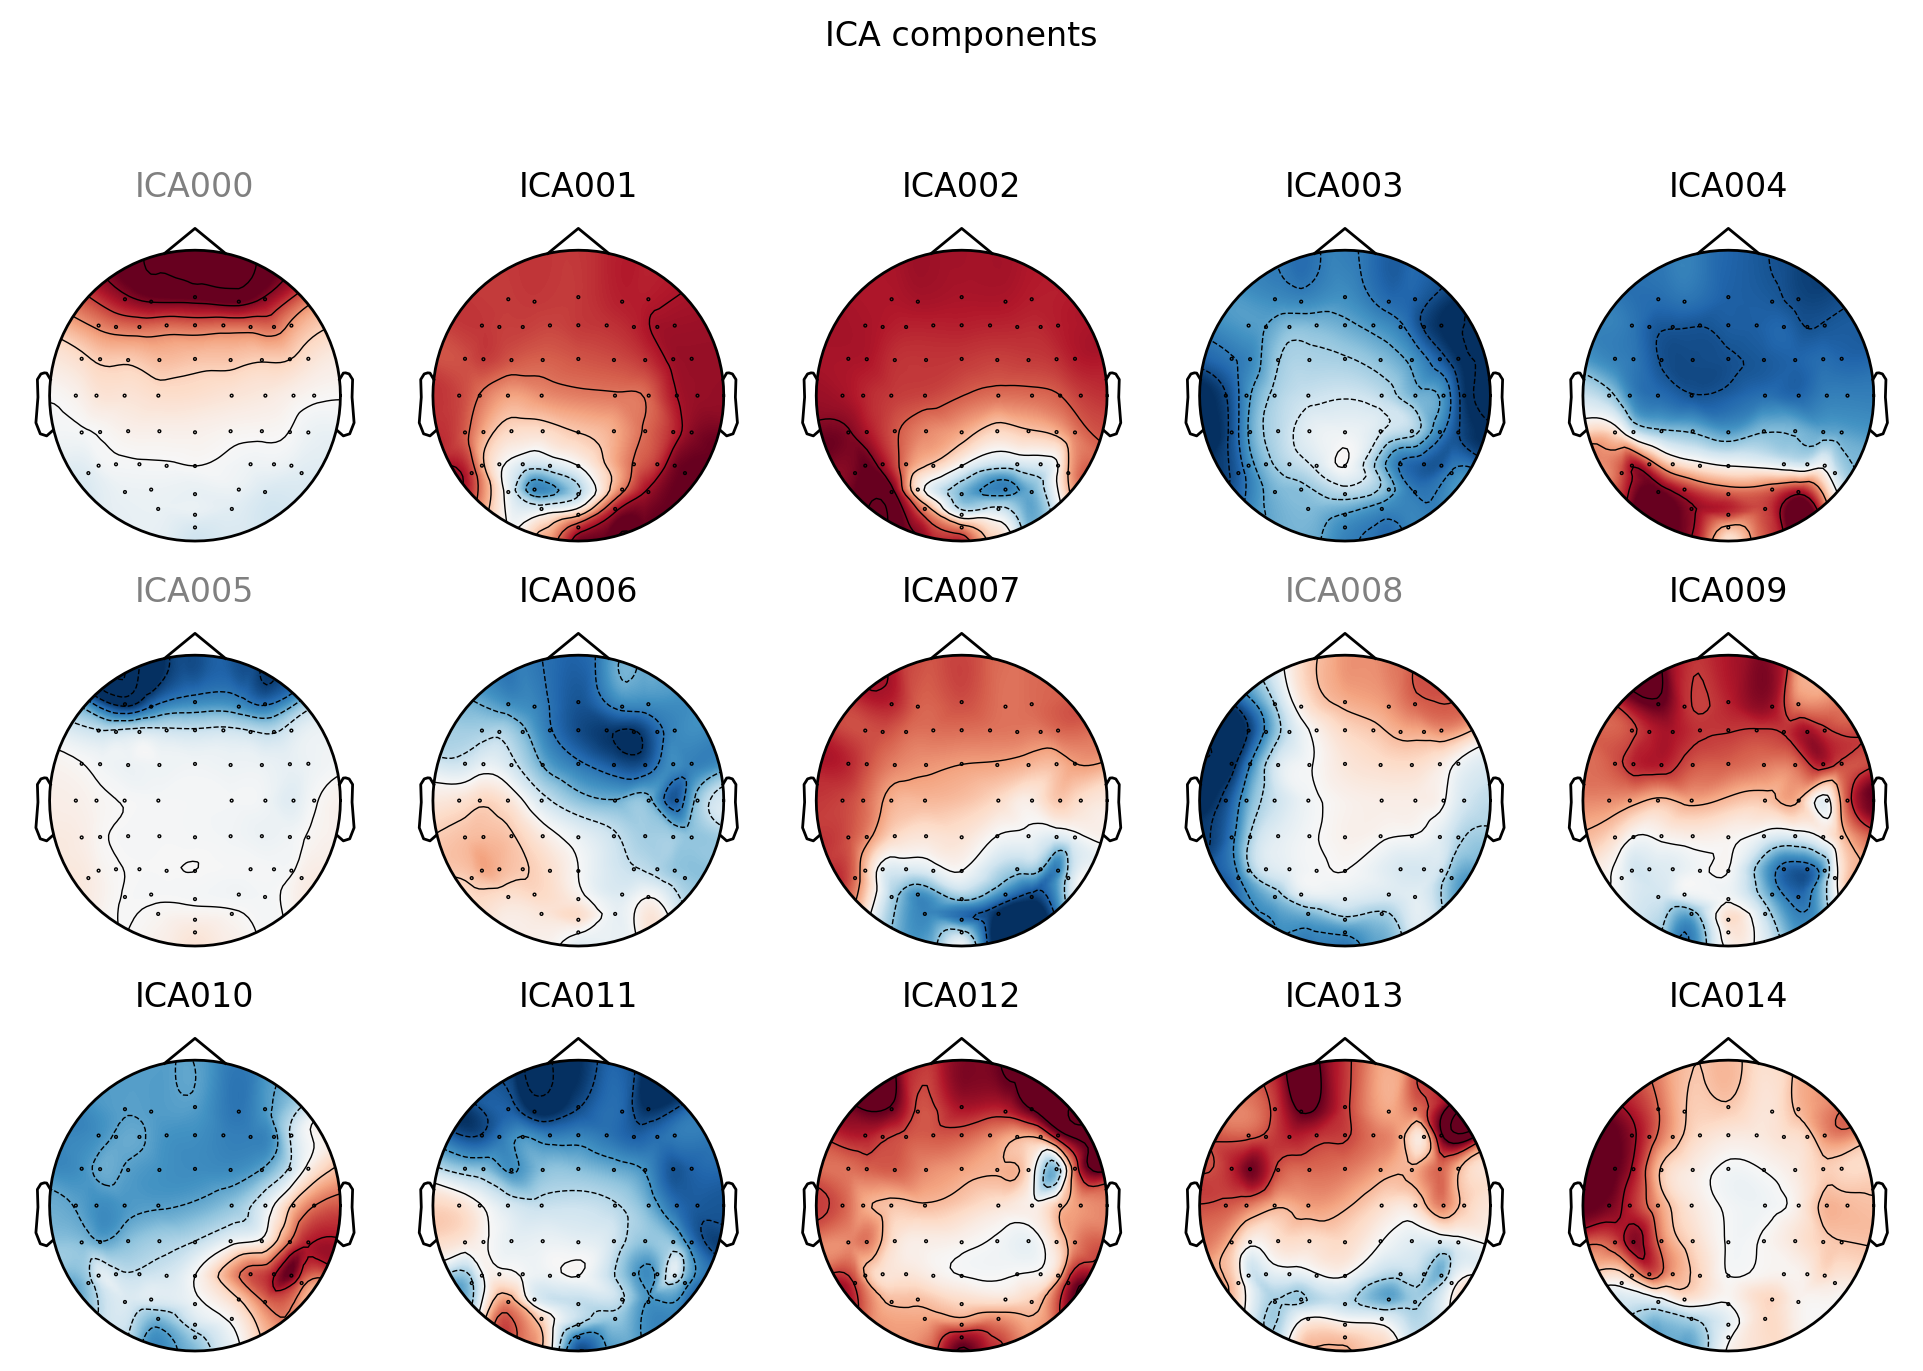

In [110]:
ica.plot_components(inst = epochs_clean,picks=range(15))

Not setting metadata
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-111-5e6ac89eb2f8>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  ica.plot_sources(epochs_clean, block=False)


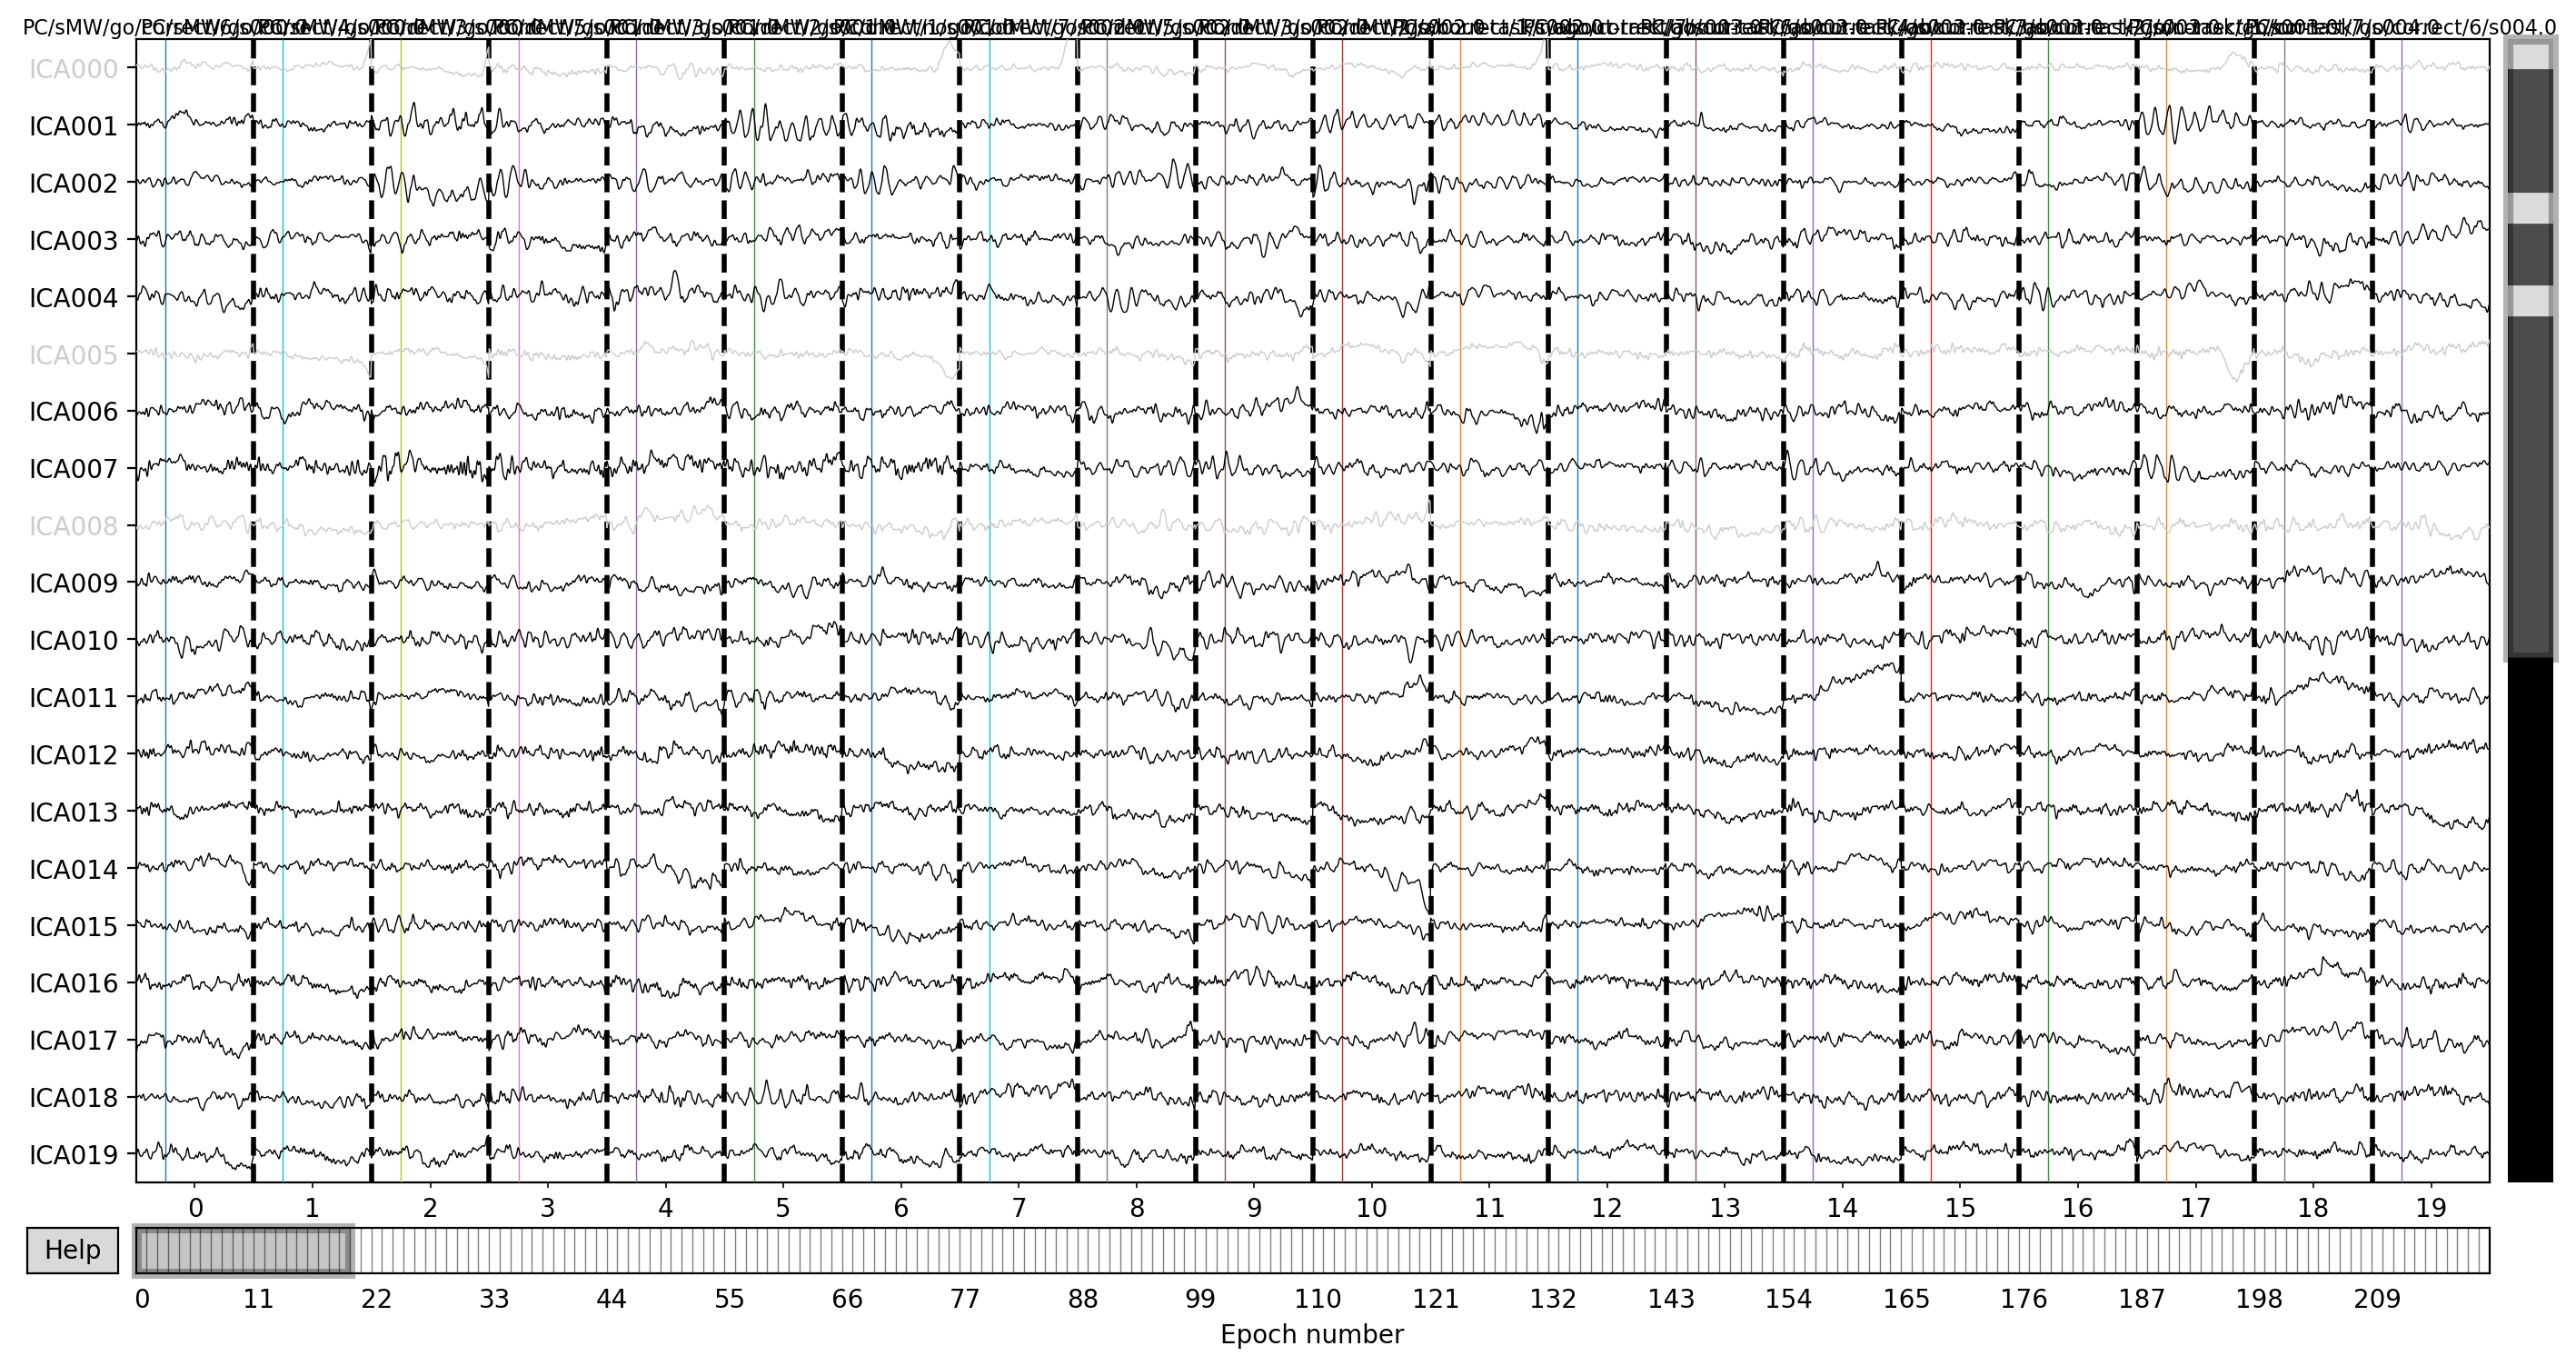

In [111]:
ica.plot_sources(epochs_clean, block=False)

In [112]:
epochs_ica = ica.apply(inst = epochs_clean)
epochs_ica.save(folder +  participant + '_' + epoch_type + '_' +  'ar_ica_epo.fif', overwrite = True)

# Interpolate bad channels <a name="interpolate"></a>


epochs_interpolate = epochs_ica.copy().interpolate_bads()
epochs_interpolate.save(folder +  participant + '_' + epoch_type + '_' +  'ar_interpolate_epo.fif', overwrite = True)

# Average Rereference <a name="rereference"></a>

epochs_rereferenced, ref_data = mne.set_eeg_reference(inst = epochs_interpolate, ref_channels = 'average', copy = True)
epochs_rereferenced.save(folder +  participant + '_' + epoch_type + '_' +  'ar_rereferenced_epo.fif', overwrite = True)

# Subtract ERP

epochs_subtracted = epochs_rereferenced.copy().subtract_evoked()
epochs_subtracted.save(folder +  participant + '_' + epoch_type + '_' +  'ar_subtracted_epo.fif', overwrite = True)

Applying ICA to Epochs instance
    Transforming to ICA space (33 components)
    Zeroing out 3 ICA components
    Projecting back using 59 PCA components
Overwriting existing file.
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors
Overwriting existing file.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Overwriting existing file.
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EXG4, EXG5, EXG3, EXG6
[done]
Overwriting existing file.
